In [186]:
#function made for reading file in which summary is present
def file_read(file_path):
  p = []
  with open(file_path,'r') as f:
    lines = f.readlines()
    f.close()
  for line in lines:
    p.append(line[:-1])
  return p

In [187]:
#importing library
import os
import sys
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer #importing sklearn library for tfidf vectorisation
import networkx as nx #importing networkx library for working on graphs

In [188]:
#path of document cluster 
DOCUMENT_PATH = 'C:/Users/hp/Documents/projects/Multi-Document-Summarization-master/DUC2004_documents_cleaned_tokenized/d30001t_raw/'

In [189]:
#initilaising lists which are required for storing candidate summary nodes and their scores. 
candidateSummary=[]
candidScore=[]
nS=[]
dicS={}
file_name = os.listdir(DOCUMENT_PATH)#storing all files inside the cluster of document.
file_path = [DOCUMENT_PATH + x for x in file_name]#getting files path inside cluster.

In [190]:
#function for calculating cosine similarity between nodes using tf–idf means term-frequency times inverse document-frequency.
def cosine_sentential_similarity(sentence):
  vectorizer = TfidfVectorizer()# getting model
  X = vectorizer.fit_transform(sentence)#sparse matrix
  y = X.todense()#from sparse converting matrix into dense form.
  t = (np.sqrt(np.sum(np.multiply(y[0,:],y[0,:])))*np.sqrt(np.sum(np.multiply(y[1,:],y[1,:]))))
  cosine_sim = np.sum(np.multiply(y[0,:],y[1,:]))/t
  return cosine_sim

In [191]:
#function for storing similarity between sentences in a matrix(2d) for a document.
def sim_matrix(single_file_path):
  sentence = file_read(single_file_path)
  m = len(sentence)
  sim_matrix = np.zeros((m,m))
  for i in range(m):
    for j in range(i,m):
      cosine_sim = cosine_sentential_similarity([sentence[i],sentence[j]])
      sim_matrix[i,j] =cosine_sim
      if(i != j):#checking for node
        sim_matrix[j,i] =cosine_sim
  return sim_matrix,sentence

In [192]:
#storing results from function made above
sim_matrix1,sentence = sim_matrix(file_path[0])
print(sim_matrix1.shape)
print(sim_matrix1)

(17, 17)
[[1.         0.18757963 0.13311126 0.16350801 0.21655668 0.09042421
  0.14454898 0.23990428 0.10380402 0.06260088 0.33609693 0.13317371
  0.16284304 0.21524253 0.2611925  0.20887403 0.09445674]
 [0.18757963 1.         0.23008353 0.07990707 0.16204993 0.
  0.11249329 0.22896177 0.12662356 0.14247351 0.1446146  0.08078407
  0.14567018 0.13026133 0.19961239 0.1183537  0.11287579]
 [0.13311126 0.23008353 1.         0.07533842 0.13667734 0.
  0.07798701 0.10201421 0.18989804 0.09670685 0.17243982 0.11885722
  0.24734591 0.10420114 0.14805646 0.10881189 0.06955749]
 [0.16350801 0.07990707 0.07533842 1.         0.1465564  0.
  0.         0.09076422 0.19920474 0.         0.16350801 0.
  0.10314885 0.19087407 0.09725248 0.         0.        ]
 [0.21655668 0.16204993 0.13667734 0.1465564  1.         0.08120727
  0.20898369 0.21569475 0.11819154 0.03635324 0.21655668 0.0440796
  0.09952411 0.14879255 0.28400429 0.13536577 0.1291895 ]
 [0.09042421 0.         0.         0.         0.081207

In [193]:
#storing sentences to check dictionary for sentences after opening of file.
sentence_dict = dict((i,sentence[i]) for i in range(len(sentence)))

In [194]:
#printing dictionary
print(sentence_dict)

{0: 'Cambodian leader Hun Sen on Friday rejected opposition parties demands for talks outside the country, accusing them of trying to internationalize the political crisis.', 1: "Government and opposition parties have asked King Norodom Sihanouk to host a summit meeting after a series of post-election negotiations between the two opposition groups and Hun Sen's party to form a new government failed.", 2: "Opposition leaders Prince Norodom Ranariddh and Sam Rainsy, citing Hun Sen's threats to arrest opposition figures after two alleged attempts on his life, said they could not negotiate freely in Cambodia and called for talks at Sihanouk's residence in Beijing.", 3: 'Hun Sen, however, rejected that.', 4: 'I would like to make it clear that all meetings related to Cambodian affairs must be conducted in the Kingdom of Cambodia, Hun Sen told reporters after a Cabinet meeting on Friday.', 5: 'No-one should internationalize Cambodian affairs.', 6: 'It is detrimental to the sovereignty of Cam

In [195]:
#setting required threshold for nodes
THRESHOLD = 0.09

In [196]:
#making graph matrix with checking whether there is an edge or not between two nodes
graph_matrix = (sim_matrix1 > THRESHOLD).astype(int)

In [197]:
#sentences in graph is categorised as node and checking graph matirx
print(graph_matrix)
print(graph_matrix.shape)

[[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1]
 [1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0]
 [1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0]
 [1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0]
 [1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0]
 [1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0]
 [1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0]
 [1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1]]
(17, 17)


In [198]:
#function creating graph and appending edges.
def make_document_graph(sentence_dict,graph_matrix):
  g = nx.Graph()
  m = graph_matrix.shape[0]
  g.add_nodes_from(np.arange(m))
  edge = []
  for i in range(m):
    for j in range(m):
      if(graph_matrix[i,j] == 1):
        edge.append((i,j))
  g.add_edges_from(edge)
  return g

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

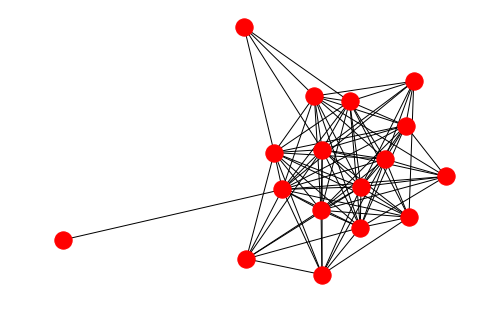

In [199]:
#storing results of a graph with name as G and drawing it
G = make_document_graph(sentence_dict,graph_matrix)
nx.draw(G)
list(G.nodes)

In [200]:
#using to show progress in loops
from tqdm import tqdm

In [201]:
#function for assigning node score of each node w.r.t each query term.
def node_weight_score(G,sentence_dict,query,num,d):
  query = query.split()#splitting query.
  m = G.number_of_nodes()
  node_score = np.ones((len(query),m))#initialising nodescore matrix with score 1.
  for i in tqdm(range(len(query))):
    for j in tqdm(range(num)):#number of times iteration works for.
      for k in tqdm(range(m)):
        summed_sim = 0
        for t in range(m):
          summed_sim += cosine_sentential_similarity([sentence_dict[t],query[i]])
        #first part of 2nd equation.
        relevant_score = d * (cosine_sentential_similarity([sentence_dict[k],query[i]]))/summed_sim
        adj_s = [n for n in G.neighbors(k)]#list of nodes containing neigbours of node k.
        total_neighbors_score = 0
        for  t in range(len(adj_s)):
          neighbor_score = 0
          adj_v = [n for n in G.neighbors(adj_s[t])]
          for r in range(len(adj_v)):
            neighbor_score += cosine_sentential_similarity([sentence_dict[adj_v[r]],sentence_dict[adj_s[t]]])
          total_neighbors_score += cosine_sentential_similarity([sentence_dict[k],sentence_dict[adj_s[t]]])*node_score[i,adj_s[t]]/neighbor_score
        total_neighbors_score = (1-d)*total_neighbors_score#second part of second equation.


        node_score[i,k] = total_neighbors_score + relevant_score#summing up second equation.
  return node_score


In [202]:
#storing results of node score in matrix where rows are defined as number of query and column as total nodes.
%time
node_score = node_weight_score(G,sentence_dict,"Cambodian People's Party",5,0.85)

Wall time: 0 ns


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

  6%|████▉                                                                              | 1/17 [00:00<00:10,  1.56it/s]

 12%|█████████▊                                                                         | 2/17 [00:01<00:09,  1.55it/s]

 18%|██████████████▋                                                                    | 3/17 [00:01<00:08,  1.61it/s]

 24%|███████████████████▌                                                               | 4/17 [00:02<00:06,  1.86it/s]

 29%|████████████████████████▍                                                          | 5/17 [00:02<00:06,  1.87it/s]

 35%|█████████████████████████████▎                                                     | 6/17 [00:02<00:04,  2.37it/s]

 41%|███████████████████████████

 53%|███████████████████████████████████████████▉                                       | 9/17 [00:04<00:04,  1.93it/s]

 59%|████████████████████████████████████████████████▏                                 | 10/17 [00:04<00:03,  2.19it/s]

 65%|█████████████████████████████████████████████████████                             | 11/17 [00:05<00:02,  2.01it/s]

 71%|█████████████████████████████████████████████████████████▉                        | 12/17 [00:05<00:02,  2.21it/s]

 76%|██████████████████████████████████████████████████████████████▋                   | 13/17 [00:06<00:01,  2.10it/s]

 82%|███████████████████████████████████████████████████████████████████▌              | 14/17 [00:06<00:01,  1.94it/s]

 88%|████████████████████████████████████████████████████████████████████████▎         | 15/17 [00:07<00:01,  1.84it/s]

 94%|█████████████████████████████████████████████████████████████████████████████▏    | 16/17 [00:08<00:00,  1.79it/s]

100%|███████████████████████████

 40%|█████████████████████████████████▌                                                  | 2/5 [00:18<00:27,  9.03s/it]

  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

  6%|████▉                                                                              | 1/17 [00:00<00:11,  1.33it/s]

 12%|█████████▊                                                                         | 2/17 [00:01<00:11,  1.32it/s]

 18%|██████████████▋                                                                    | 3/17 [00:02<00:09,  1.46it/s]

 24%|███████████████████▌                                                               | 4/17 [00:02<00:08,  1.62it/s]

 29%|████████████████████████▍                                                          | 5/17 [00:03<00:07,  1.62it/s]

 35%|█████████████████████████████▎                                                     | 6/17 [00:03<00:05,  2.15it/s]

 41%|███████████████████████████

 41%|██████████████████████████████████▏                                                | 7/17 [00:04<00:06,  1.60it/s]

 47%|███████████████████████████████████████                                            | 8/17 [00:05<00:06,  1.45it/s]

 53%|███████████████████████████████████████████▉                                       | 9/17 [00:06<00:05,  1.34it/s]

 59%|████████████████████████████████████████████████▏                                 | 10/17 [00:06<00:04,  1.70it/s]

 65%|█████████████████████████████████████████████████████                             | 11/17 [00:07<00:04,  1.39it/s]

 71%|█████████████████████████████████████████████████████████▉                        | 12/17 [00:08<00:03,  1.47it/s]

 76%|██████████████████████████████████████████████████████████████▋                   | 13/17 [00:08<00:02,  1.51it/s]

 82%|███████████████████████████████████████████████████████████████████▌              | 14/17 [00:09<00:02,  1.49it/s]

 88%|███████████████████████████

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:08<00:00,  2.03it/s]


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:38<00:09,  9.76s/it]

  0%|                                                                                           | 0/17 [00:00<?, ?it/s]

  6%|████▉                                                                              | 1/17 [00:00<00:09,  1.60it/s]

 12%|█████████▊                                                                         | 2/17 [00:01<00:09,  1.52it/s]

 18%|██████████████▋                                                                    | 3/17 [00:02<00:09,  1.49it/s]

 24%|███████████████████▌                                                               | 4/17 [00:02<00:08,  1.60it/s]

 29%|████████████████████████▍                                                          | 5/17 [00:03<00:07,  1.55it/s]

 35%|██████████████████████████

In [203]:
# checking our node score matrix.
print(node_score)
print(node_score.shape)

[[1.88701488e-01 5.02219400e-03 3.33988806e-03 3.50873508e-03
  1.65947090e-01 4.29208755e-01 4.51273760e-03 1.66083637e-01
  3.33384385e-03 1.30419578e-04 6.36937726e-03 1.35168895e-03
  3.42540467e-03 5.05903116e-03 7.10319740e-03 3.95144737e-03
  3.14413187e-03]
 [1.13345516e-02 1.06985556e-02 5.13310255e-03 4.52780203e-03
  1.02563457e-02 9.82776679e-05 7.89930195e-03 8.92311542e-01
  7.00756163e-03 2.22394658e-04 9.08055660e-03 5.09005459e-04
  5.97109492e-03 1.01488678e-02 1.33277784e-02 5.34705189e-03
  6.34032374e-03]
 [9.80298564e-03 1.96989847e-01 5.39623297e-03 2.37566123e-03
  1.02317181e-02 9.17499598e-05 9.78679393e-03 2.22858392e-01
  5.22343630e-03 1.66902372e-03 8.84185338e-03 1.67088198e-03
  4.81507764e-03 6.28436795e-03 2.37280844e-01 4.30252869e-03
  2.72586746e-01]]
(3, 17)


In [204]:
#function for finding ctree cscore.
def cscore1(ree,j,r,node_score,sim_matrix1,beta,G):
    s=0
    k=nx.single_source_shortest_path_length(ree,r)#getting dictionary of length of path from starting node to other to get level of a node.
    for u in ree.nodes():
        score=0
        l=[]#list for appending neighbour node score.
        p=[]#list for appending edge weight.
        for x in G.neighbors(u):
            if x not in ree.predecessors(u):     
                l.append(node_score[j][x])#appending neighbours weight score.
            p.append(sim_matrix1[x][u])#incident edge weight on node u.
        p.sort(reverse=True)#index 0 will get max incident edge weight.
        l.append(0)
        l.append(0)
        l.append(0)
        l.sort(reverse=True)#sorting in decreasing order to maxmimum weights first.
        a=(l[0]+l[1]+l[2])/3#top three neighbour weight.
        b=p[0]
        alpha=(a*1.5)/b
        for v in ree.successors(u):#getting iterator over children of node u.
            s+=(alpha*sim_matrix1[u][v]+beta*node_score[j][u])/((k[v]+1)**2)  
        score=beta*node_score[j][r]+s#implementing equation 3.
    return score

In [205]:
tree=[]
tscore=[]
#function for creating ctree.
que="Cambodian People's Party"
query = que.split()
def ctre(r,j,node_score,sim_matrix1,G):
    q=query[j]
    b=3
    beta=1
    d=len(G)
    openlist=[r]
    closedlist=[]
    expandedarea=[]
    ctree=nx.DiGraph()
    cscore=0
    level=0
    lpd={}#dictionary conatining nodes with h values.
    lph={}
    while(level<d):#visiting graph in bfs order.
        for n in openlist:
            if n not in closedlist:
                ll=[]
                pp=[]
                #computing h values for each neighbor of node n.
                for x in G.neighbors(n):    
                    ll.append(node_score[j][x])
                    pp.append(sim_matrix1[x][n])
                pp.sort(reverse=True)
                ll.append(0)
                ll.append(0)
                ll.append(0)
                ll.sort(reverse=True)
                aa=(ll[0]+ll[1]+ll[2])/3
                bb=pp[0]
                alpha=(aa*1.5)/bb
                p={}
                g={}
                for x in G.neighbors(n):
                    h=alpha*sim_matrix1[x][n]+beta*node_score[j][x]
                    p[x]=h #mapping h values with their nodes.
                g=p
                p=(sorted(p.items(), key = lambda kv:(kv[1], kv[0])))
                le=0
                k=len(p)
                w=[]
                if(k<b):#if beam width of exploring nodes is more .
                    for la in range(k):
                        if p[la][0] not in expandedarea:
                            expandedarea.append(p[la][0])
                        if p[la][0] not in lph.keys():
                            lph[p[la][0]]=p[la][1]
                        w.append(p[la][0])
                else:#if more number of exploring childrens are present .
                    while(le<b):
                        if p[le][0] not in expandedarea:
                            expandedarea.append(p[le][0])
                        if p[le][0] not in lph.keys():
                            lph[p[le][0]]=p[le][1]
                        w.append(p[le][0])
                        le+=1
                lpd[n]=w
                openlist.remove(n)  
                closedlist.append(n)
        if q in sentence_dict[r]:#if root node has query then add it to ctree and nodes in expanded area as children.
            ctree.add_node(r)#adding node.
            ed=[]
            for kl in expandedarea:
                ed.append((r,kl))#appending edges of node to children .
            ctree.add_edges_from(ed)
            tree.append(ctree)
            return ed#returning all edges in a list.
        else:#if nodes in expanded area has query.
            expandedarea_q=[]
            f={}
            ff=[]
            #getting node which has query in it in expanded area. 
            for node in expandedarea:
                if q in sentence_dict[node]:
                    expandedarea_q.append(node)
                    f[node]=g[node]
            if (len(f)!=0):
                f=(sorted(f.items(), key = lambda kv:(kv[1], kv[0])))
                for laa in range(len(f)):
                    ff.append(f[laa][0])
                anchor=ff[len(ff)-1]#node in expanded area having highest h value.
                eedge=[]
                while(anchor!=r):#while anchor is not equal to parent node r loop below code.
                    tat=[]
                    for m in lpd.keys():
                        if anchor in lpd[m]:
                            tat.append(m)
                    tath={}#list made for identifying highest h value parent. 
                    if(len(tat)>1):
                        for l in tat:
                            tath[l]=lph[l]
                        tath=(sorted(tath.items(), key = lambda kv:(kv[1], kv[0])))
                        parent=tath[0][0]
                    else:
                        parent=tat[0]
                    for ea in lpd[parent]:#adding anchor and its siblings edges.
                        eedge.append((parent,ea))
                    anchor=parent
                ctree.add_edges_from(eedge)
                ctree.add_node(r)
                tree.append(ctree)
                return eedge
        openlist=expandedarea
        expandedarea=[]
        level+=1

In [206]:
#making summary graph for each node and calculating its score.
que="Cambodian People's Party"
query = que.split()
print(query)
l=list(G.nodes)
beta=1
sg=[]#list conatining summary graphs for each node.
sscore=[]#list containing summary graph score for each node.
for r in l:#iterating loop through all nodes.
    s=0
    scor=0#initilaising score as zero.
    ed=[]
    g=nx.DiGraph()
    for j in range(len(query)):#iterating loops through each query. 
        d=[]
        d=ctre(r,j,node_score,sim_matrix1,G)#computing ctree for node w.r.t query.
        ree=nx.DiGraph()
        if d is None:
            break
        else:
            for e in d:
                ed.append(e)
            ree.add_edges_from(d)
            p=cscore1(ree,j,r,node_score,sim_matrix1,beta,G)#computing ctree score w.r.t query.
            s+=p
    if(len(ed)!=0):
        g.add_edges_from(ed)
        sg.append(g)
        scor=1*s/(np.sqrt(len(g)))#implementing equation 4.
        sscore.append(scor)

['Cambodian', "People's", 'Party']


In [207]:
mn=-9
inde=0
#finding highest score summary graph and append it into the candidate summary list.
for a in range(len(sscore)):
    if(sscore[a]>mn):
        mn=sscore[a]
        inde=a#found index for highest score summary.
s1=sg[inde]
candidateSummary.append(s1)#list containing highest score summary graphs.
candidScore.append(sscore[inde])
nS.append(node_score)
dic={}#dictionay containing all sentences in candidate summary graphs.
for n in s1.nodes:
    dic[n]=sentence_dict[n]
dicS[s1]=dic


4
4
6
[1.1619255365606747]
{<networkx.classes.digraph.DiGraph object at 0x000001BE07EADF28>: {7: "Hun Sen's Cambodian People's Party won 64 of the 122 parliamentary seats in July's elections, short of the two-thirds majority needed to form a government on its own.", 3: 'Hun Sen, however, rejected that.', 2: "Opposition leaders Prince Norodom Ranariddh and Sam Rainsy, citing Hun Sen's threats to arrest opposition figures after two alleged attempts on his life, said they could not negotiate freely in Cambodia and called for talks at Sihanouk's residence in Beijing.", 15: 'A meeting outside Cambodia, as suggested by the opposition, could place all parties on more equal footing, said the statement.'}}
[array([[1.88701488e-01, 5.02219400e-03, 3.33988806e-03, 3.50873508e-03,
        1.65947090e-01, 4.29208755e-01, 4.51273760e-03, 1.66083637e-01,
        3.33384385e-03, 1.30419578e-04, 6.36937726e-03, 1.35168895e-03,
        3.42540467e-03, 5.05903116e-03, 7.10319740e-03, 3.95144737e-03,
    

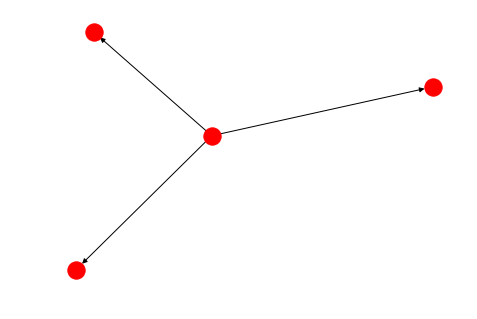

In [208]:
#checking our lists made for identification.
nx.draw(s1)
print(len(sg))
print(len(sscore))
print(len(tree))
print(candidateSummary)
print(candidScore)
print(dicS)
print(nS)

In [209]:
#appending highest candidiate summary in list.
final_S=[]#containing final summary.
mn=-100000000000
inde=0
#getting highest score candidate summary.
for a in range(len(candidScore)):
    if(candidScore[a]>mn):
        mn=candidScore[a]
        inde=a
s1=candidateSummary[inde]
for n in s1.nodes:
    final_S.append(dicS[s1][n])

In [210]:
#checking lists.
print(final_S)
# copycandidateSummary=candidateSummary
# copycandidScore=candidScore
# copydicS=dicS
# copynS=nS

["Hun Sen's Cambodian People's Party won 64 of the 122 parliamentary seats in July's elections, short of the two-thirds majority needed to form a government on its own.", 'Hun Sen, however, rejected that.', "Opposition leaders Prince Norodom Ranariddh and Sam Rainsy, citing Hun Sen's threats to arrest opposition figures after two alleged attempts on his life, said they could not negotiate freely in Cambodia and called for talks at Sihanouk's residence in Beijing.", 'A meeting outside Cambodia, as suggested by the opposition, could place all parties on more equal footing, said the statement.']


In [64]:
#implementing maximal marginal reranking method.
candidateSummary.remove(candidateSummary[inde])
candidScore.remove(candidScore[inde])
nS.remove(nS[inde])
lambd=0.6
user_sentence=6#input required summary size.
while(len(final_S)<user_sentence):#checking size is reached or not for final summary.
    mxx=-100000000000000
    for i in range(len(candidateSummary)):
        for nod in candidateSummary[i].nodes:#checking for nodes value and appending then in final lists.
            su1=0
            mx=-100000000000000
            for k in range(len(query)):
                su1+=nS[i][k][nod]#summing node score value w.r.t given query.
            for j in range(len(final_S)):
                su2=cosine_sentential_similarity([dicS[candidateSummary[i]][nod],final_S[j]])
                if(su2>mx):
                    mx=su2#getting maximum cosine similarity among nodes.
            mmr=lambd*su1-(1-lambd)*mx#implementing equation 5.
            if(mmr>mxx):
                mxx=mmr#getting maximum of above equation of mmr.
                ot=dicS[candidateSummary[i]][nod]
    final_S.append(ot)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


In [65]:
#required final summary.
print(final_S)

["Cambodian leader Hun Sen's ruling party and the two-party opposition had called on the monarch to lead top-level talks, but disagreed on its location.", 'International monitors said the election was relatively free and fair.', "King Norodom Sihanouk has declined requests to chair a summit of Cambodia's top political leaders, saying the meeting would not bring any progress in deadlocked negotiations to form a government.", 'In September, thousands of people filled the streets of Phnom Penh to protest against the alleged election fraud.', 'Hun Sen, however, rejected that.', "The ruling party supported the police action in its statement, noting that public property was damaged by protesters and that grenades were thrown at Hun Sen's home after Sam Rainsy suggested in a speech that the U.S. government should fire cruise missiles at Hun Sen."]


In [12]:
#evaluation using rouge scores.
from rouge import Rouge 
final_S="Cambodian leader Hun Sen's ruling party and the two-party opposition had called on the monarch to lead top-level talks, but disagreed on its location.International monitors said the election was relatively free and fair.King Norodom Sihanouk has declined requests to chair a summit of Cambodia's top political leaders, saying the meeting would not bring any progress in deadlocked negotiations to form a government.Hun Sen, however, rejected that,The ruling party supported the police action in its statement, noting that public property was damaged by protesters and that grenades were thrown at Hun Sen's home after Sam Rainsy suggested in a speech that the U.S. government should fire cruise missiles at Hun Sen."
reference = " New Cambodian government in limbo as Hun Sen rejects talks out of country . Hun Sen rejects out of country talks, Sihanouk asked to host summit. Cambodian leader Hun Sen rejects opposition demands for talks in Beijing.  Cambodian government rejects opposition's call for talks abroad ."
rouge = Rouge()
scores = rouge.get_scores(final_S, reference)
print(scores)

[{'rouge-1': {'f': 0.20253164155103354, 'p': 0.14035087719298245, 'r': 0.36363636363636365}, 'rouge-2': {'f': 0.038461534468277866, 'p': 0.02654867256637168, 'r': 0.06976744186046512}, 'rouge-l': {'f': 0.19130434423289228, 'p': 0.125, 'r': 0.4074074074074074}}]
